# 第二周实验

1. Python 流程控制: 编写循环控制代码用下面公式逼近圆周率(精确到小数点后 15 位), 并且和 math.pi 的值做比较

$$
\frac{1}{\pi} = \frac{2\sqrt{2}}{9801}\sum_{k = 0}^{\infty}\frac{\left( 4k \right)!\left( 1103 + 26390k \right)}{k!^{4}\left( 396^{4k} \right)}
$$


In [97]:
def factorial(num):
    if num == 0:
        return 1
    else:
        return num*factorial(num-1)


Pi = 0
k = (2**(1/2))*2/9801

for o in range(0, 100):
    k1 = factorial(4*o)
    k2 = factorial(o)
    Pi += k1*(1103+26390*o)/(k2*(396**(4*o)))
Pi *= k
print(1/Pi)

pi counted: 3.141592653589793
math.pi: 3.141592653589793
误差: 0.0%


2. Python 流程控制: 阅读[https://en.wikipedia.org/wiki/Koch_snowflake](https://en.wikipedia.org/wiki/Koch_snowflake)，通过修改 koch.py 绘制其中一种泛化的 Koch 曲线。

    目标图像如下：

    ![](./2.2_koch.png)

In [1]:
from swampy.TurtleWorld import *


def koch(t, n):
    if n < 3:
        fd(t, 3*n)
        return
    m = n/3.0
    koch(t, m)
    lt(t, 85)  # cesaro分形85°
    koch(t, m)
    rt(t, 170)
    koch(t, m)
    lt(t, 85)
    
    koch(t, m)


def cesaro(t, n):
    for i in range(4):  # 改成了4边形
        koch(t, n)
        lt(t, 90)  # 左转90°


world = TurtleWorld()
bob = Turtle()
bob.delay = 0

bob.x = 100
bob.y = -390

cesaro(bob, 1000)

bob.die()
wait_for_user()


3. **生日相同情形的概率分析:**

   (1) 生成 M (M $\ge$ 1000)个班级，每个班级有 N 名同学，用`input`接受 M 和 N；

   (2) 用`random`模块中的`randint`生成随机数作为 N 名同学的生日;

   (3) 计算 M 哥班级中存在相同生日情况的班级数 Q，用 P = Q / M 作为对戏相同生日概率的估计；

   (4) 分析 M，N 和 P 之间的关系。


In [13]:
import random
from pprint import pprint
from time import time
import re
# from collections import Counter

# days_of_each_month = (31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)
# last_day_of_month = tuple(
#     sum(days_of_each_month[0:i]) for i in range(0, len(days_of_each_month) + 1))

# def CalculateDate(birthday: int):
#     for i in range(len(last_day_of_month)):
#         if last_day_of_month[i] >= birthday:
#             return (i, birthday - last_day_of_month[i - 1])

def GetClassAndNum() ->tuple:
    string = input("请输入班级数M与同学数N，用空格间隔")
    ans = re.findall(r"\b\d+\b", string)
    if len(ans) == 2:
        return (int(ans[0]), int(ans[1]))
    else:
        print("输入格式有误...")
        return GetClassAndNum()

def PofSameBrithdaysExistClass(student_class_num: int, student_num: int):
    student_birthdays = tuple(tuple(random.randint(1, 366) for i in range(
        student_num)) for j in range(student_class_num))
    return CountSameBirthdaysExistClass(student_birthdays) / student_class_num

def CountSameBirthdaysExistClass(student_birthdays: tuple):
    ans = 0
    for classes in student_birthdays:
        if len(classes) > len(set(classes)):
            ans += 1
    return ans

student_class_num, student_num = GetClassAndNum()
start_time = time()
print(PofSameBrithdaysExistClass(student_class_num, student_num))
print(f"Time Cost: {time() - start_time}")


1.0
Time Cost: 0.7427301406860352


In [45]:
student_class_num = 1000
start_time = time()
y_labels_1000 = [PofSameBrithdaysExistClass(student_class_num, student_num) for student_num in range(1, 366)]
print(f"Time Cost: {time() - start_time}")
# pprint(y_labels_1000)

Time Cost: 50.004409074783325


In [14]:
import numpy as np


def PofSameBrithdaysExistClassWithNp(student_class_num: int, student_num: int):
    student_birthdays = np.random.randint(
        1, 366, (student_class_num, student_num))
    return CountSameBirthdaysExistClassWithNp(student_birthdays) / student_class_num


def CountSameBirthdaysExistClassWithNp(student_birthdays: tuple):
    ans = 0
    for classes in student_birthdays:
        if len(classes) > len(np.unique(classes)):
            ans += 1
    return ans


student_class_num, student_num = GetClassAndNum()
start_time = time()
print(PofSameBrithdaysExistClassWithNp(student_class_num, student_num))
print(f"Time Cost: {time() - start_time}")


1.0
Time Cost: 0.11522889137268066


In [15]:
student_class_num = 1000
start_time = time()
y_labels_1000 = [PofSameBrithdaysExistClassWithNp(
    student_class_num, student_num) for student_num in range(1, 366)]
print(f"Time Cost: {time() - start_time}")
# pprint(y_labels_1000)


Time Cost: 4.288274049758911


In [16]:
student_class_num = 5000
y_labels_5000 = [PofSameBrithdaysExistClassWithNp(
    student_class_num, student_num) for student_num in range(1, 366)]
# pprint(y_labels_5000)


student_class_num = 10000
y_labels_10000 = [PofSameBrithdaysExistClassWithNp(
    student_class_num, student_num) for student_num in range(1, 366)]
# pprint(y_labels_10000)

In [17]:
def SameBirthday(student_num: int) -> float:
    all_symple = 365 ** student_num
    no_same = 1
    for i in range(1, student_num + 1):
        no_same = no_same * (365 - i + 1)
    return 1 - no_same / all_symple


y_labels_count = [SameBirthday(student_num) for student_num in range(1, 366)]
# pprint(y_labels_count)


In [18]:
from pandas import Series


def calc_corr(a, b):
    s1 = Series(a)
    s2 = Series(b)
    return s1.corr(s2)

Corr_1000 = calc_corr(y_labels_1000, y_labels_count)
Corr_5000 = calc_corr(y_labels_5000, y_labels_count)
Corr_10000 = calc_corr(y_labels_10000, y_labels_count)

print(Corr_1000)
print(Corr_5000)
print(Corr_10000)

0.9997206844389973
0.999954336706224
0.9999770851118985


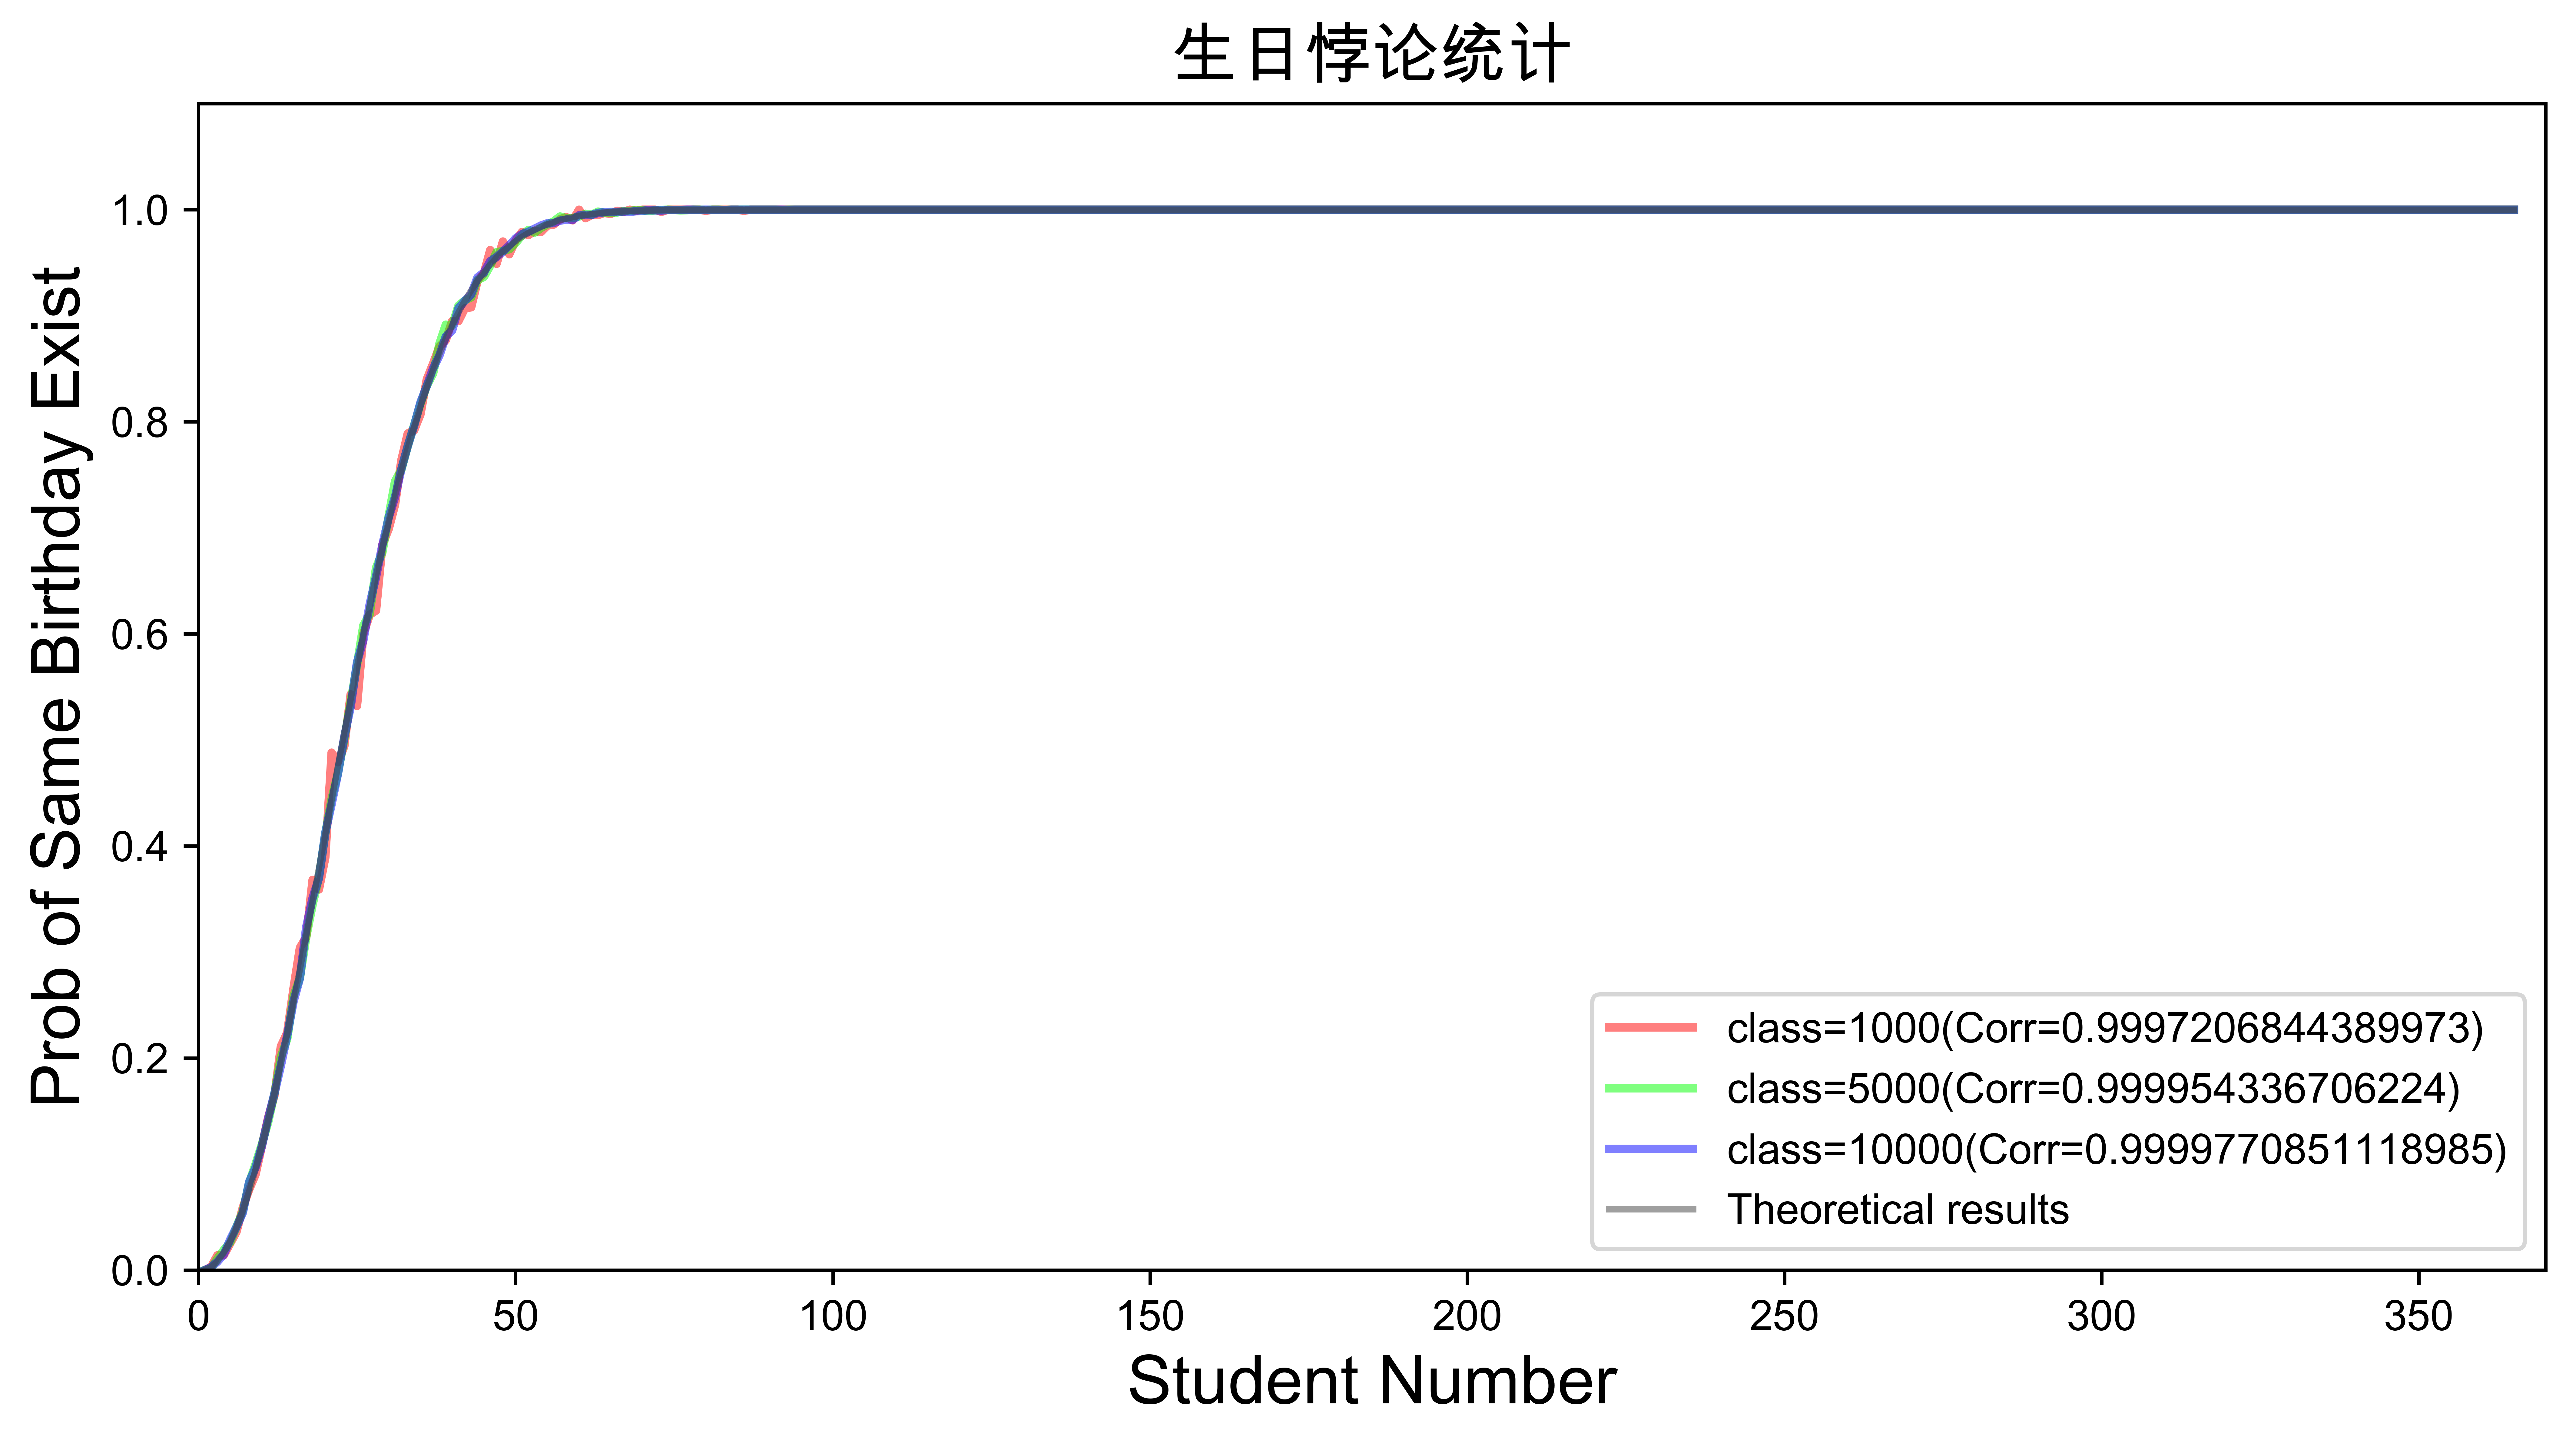

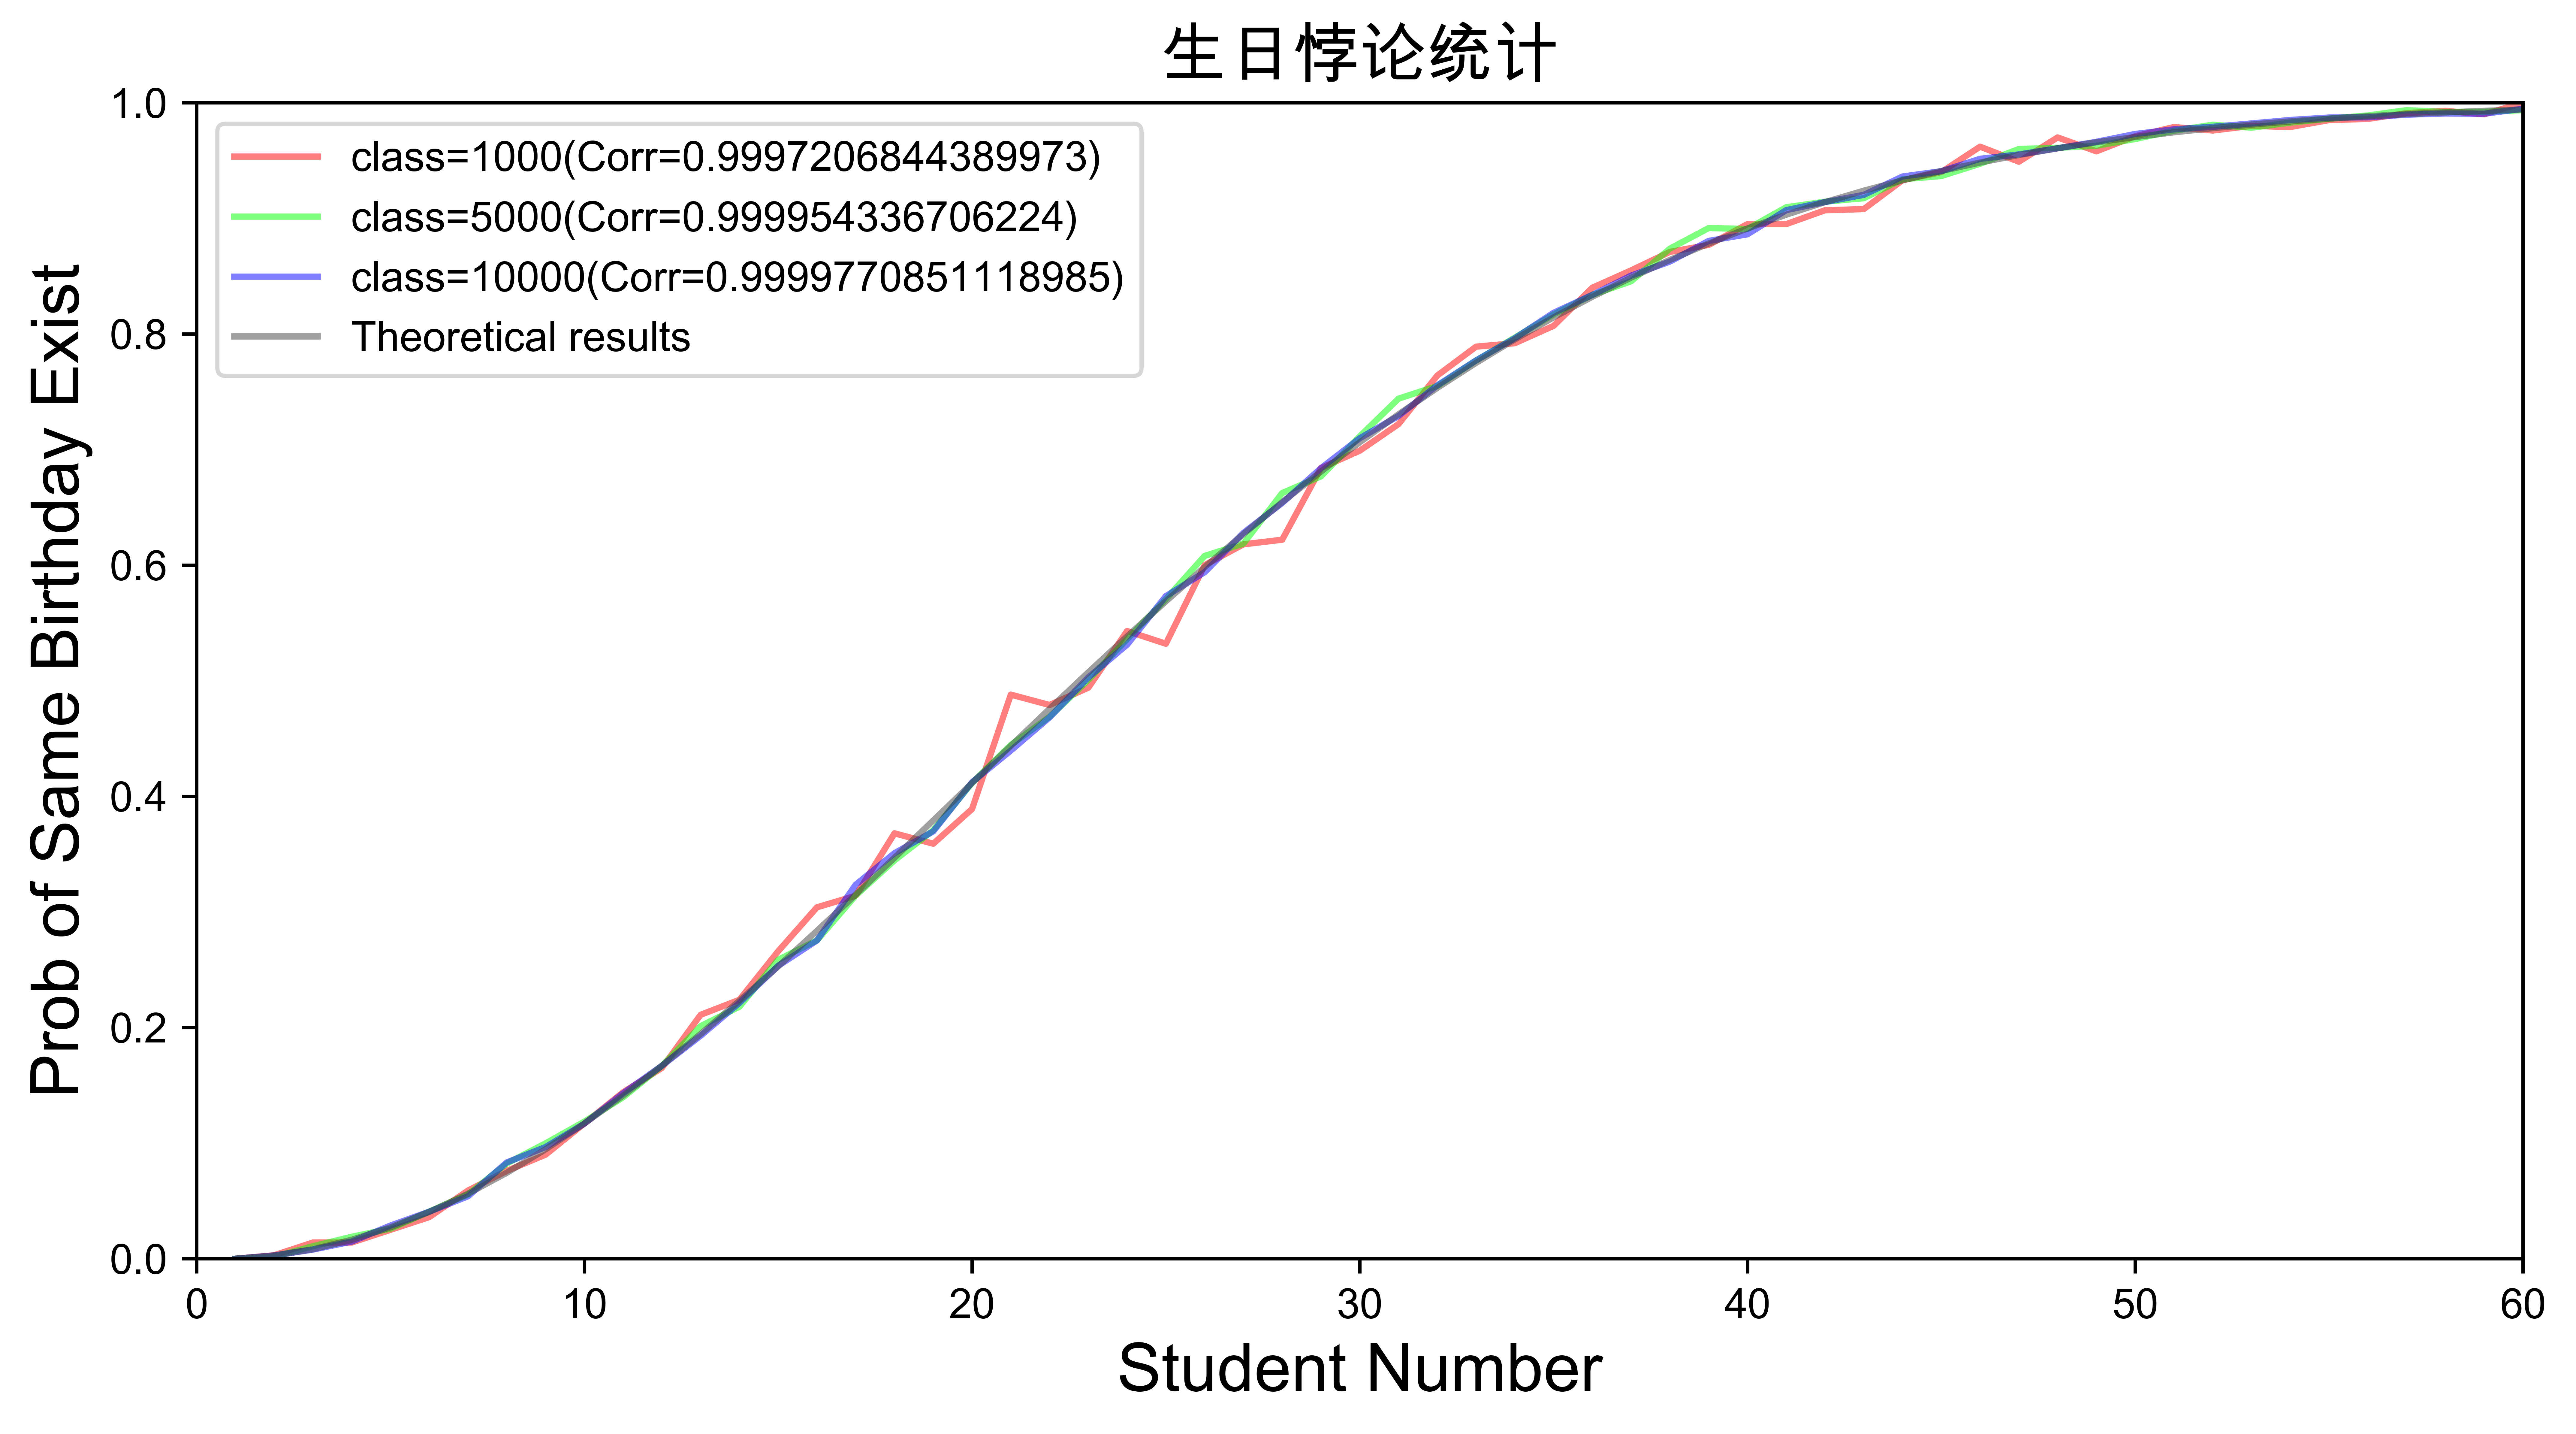

In [20]:
import matplotlib.pyplot as plt
import sys

x_labels = [i for i in range(1, 366)]

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.figure(figsize=(10, 5), dpi=1000)
plt.plot(x_labels, y_labels_1000, color="#FF000080",
         label=f"class=1000(Corr={Corr_1000})", linewidth=2)
plt.plot(x_labels, y_labels_5000, color="#00FF0080",
         label=f"class=5000(Corr={Corr_5000})", linewidth=2)
plt.plot(x_labels, y_labels_10000, color="#0000FF80",
         label=f"class=10000(Corr={Corr_10000})", linewidth=2)
plt.plot(x_labels, y_labels_count, color="#40404080",
         label="Theoretical results")
plt.xlabel("Student Number", fontdict={'size': 16})
plt.ylabel("Prob of Same Birthday Exist", fontdict={'size': 16})
plt.title("生日悖论统计", fontdict={'size': 16})
plt.xlim((0, 370))
plt.ylim((0, 1.1))
plt.legend()
plt.savefig(f'{sys.path[0]}/../Img/生日悖论统计1.png', dpi=1000)
plt.show()

plt.figure(figsize=(10, 5), dpi=1000)
plt.plot(x_labels[:60], y_labels_1000[:60], color="#FF000080", label=f"class=1000(Corr={Corr_1000})")
plt.plot(x_labels[:60], y_labels_5000[:60], color="#00FF0080", label=f"class=5000(Corr={Corr_5000})")
plt.plot(x_labels[:60], y_labels_10000[:60], color="#0000FF80", label=f"class=10000(Corr={Corr_10000})")
plt.plot(x_labels[:60], y_labels_count[:60], color="#40404080", label="Theoretical results")
plt.xlabel("Student Number", fontdict={'size': 16})
plt.ylabel("Prob of Same Birthday Exist", fontdict={'size': 16})
plt.title("生日悖论统计", fontdict={'size': 16})
plt.xlim((0, 60))
plt.ylim((0, 1))
plt.legend()
plt.savefig(f'{sys.path[0]}/../Img/生日悖论统计2.png', dpi=1000)
plt.show()


4. 参照验证实验 1 中反序词实现的例示代码，设计 Python 程序找出 words.txt 中最长的“可缩减单词”(所谓“可缩减单词”是指: 每次删除单词的一个字母，剩下的字母依序列排列仍然是一个单词，直至字母单词‘a’或者‘i’)。

   提示:

   (1) 可缩减单词例示:
   sprite $\to$ spite $\to$ spit $\to$ pit $\to$ it $\to$ i

   (2) 如果递归求解，可以引入单词空字符串`''`作为基准。

   (3) 一个单词的子单词不是可缩减的单词，则该单词也不是可缩减单词。因此记录已查找到的可缩减单词可以提速整个问题的求解。


In [ ]:
import sys
from time import time


src_dir = sys.path[0]
data_dir = "./../Data"
file_name = "words.txt"

reducable_words = set()

def ReducableWord(word: str, alphabet: set[str]):
    if word == 'i' or word == 'a' or word in reducable_words:
        return True
    for i in range(len(word)):
        reduced_word = word[:i] + word[i + 1:]
        if reduced_word == 'i' or reduced_word == 'a' or reduced_word in alphabet:
            # print(reduced_word in alphabet)
            if ReducableWord(reduced_word, alphabet):
                return True
    return False


with open(src_dir + "/" + data_dir + "/" + file_name, "r") as file:
    start_time = time()
    longest = ''
    data = set([i.strip() for i in file.readlines()])
    for word in data:
        if ReducableWord(word, data):
            reducable_words.add(word)
            if len(word) > len(longest):
                longest = word
    print(longest)
    # print(reducable_words)
    print(f'Time cost: {time() - start_time}')
    print(f'{len(reducable_words)} words can be reduced.')
    # print(data)


complecting
Time cost: 0.6772851943969727
9767 words can be reduced.


In [10]:
from time import time


def ReducableWord(word: str, alphabet: set[str]):
    if word == 'i' or word == 'a':
        return True
    for i in range(len(word)):
        reduced_word = word[:i] + word[i + 1:]
        if reduced_word == 'i' or reduced_word == 'a' or reduced_word in alphabet:
            # print(reduced_word in alphabet)
            if ReducableWord(reduced_word, alphabet):
                return True
    return False


with open("../Data/words.txt") as file:
    start_time = time()
    longest = ''
    data = [i.strip() for i in file.readlines()]
    alphabet = set(data)
    data.sort(key=lambda i: len(i), reverse=True)
    for word in data:
        if(ReducableWord(word, alphabet)):
            print(word)
            break
print(f'Time cost: {time() - start_time}')


complecting
Time cost: 0.0942380428314209
